In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
#Reading data as pandas dataframe
df = pd.read_csv('Fake_or_Real_news.csv')

df.head(10)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [4]:
df.shape

(6335, 4)

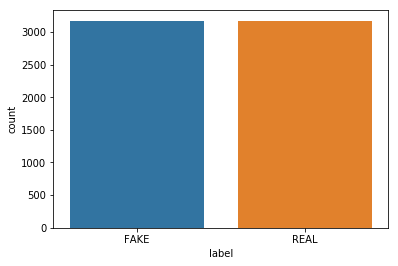

In [5]:
import seaborn as sns

sns.countplot(x= 'label', data= df)

In [6]:
#Setting the DataFrame index using existing columns
df = df.set_index("Unnamed: 0")
df.head()

,title,text,label
Unnamed: 0,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [7]:
x = df['text']
x.head()

Unnamed: 0
8476     Daniel Greenfield, a Shillman Journalism Fello...
10294    Google Pinterest Digg Linkedin Reddit Stumbleu...
3608     U.S. Secretary of State John F. Kerry said Mon...
10142    — Kaydee King (@KaydeeKing) November 9, 2016 T...
875      It's primary day in New York and front-runners...
Name: text, dtype: object

In [8]:
y = df.label
y.head()

Unnamed: 0
8476     FAKE
10294    FAKE
3608     REAL
10142    FAKE
875      REAL
Name: label, dtype: object

In [9]:
df.drop("label", axis=1)
df.head()

,title,text,label
Unnamed: 0,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [10]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=41)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4434,), (1901,), (4434,), (1901,))

In [12]:
# Initialize the `count_vectorizer` 
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

In [13]:
# Get the feature names of count_vectorizer 
print(count_vectorizer.get_feature_names()[0:10])

['00', '000', '0000', '000035', '00006', '0001', '0001pt', '0002', '000billion', '000ft']


In [14]:
# Initialize the tfidf_vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7) 
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 
tfidf_test = tfidf_vectorizer.transform(X_test)

In [15]:
# Get the feature names of tfidf_vectorizer 
print(tfidf_vectorizer.get_feature_names()[-10:])

['νοεμβρίου', 'главная', 'октября', 'эa', 'эin', 'эthe', 'яркий', 'القادمون', 'عربي', 'ยงade']


In [16]:
# view confusion matrix with a heatmap
def Confusion_matrix(cm, classes):
    
    plt.figure()
    sns.heatmap(cm, annot=True, annot_kws={"size":30}, cmap='Blues', square=True, fmt='.0f')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion matrix');

In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

accuracy:   0.895


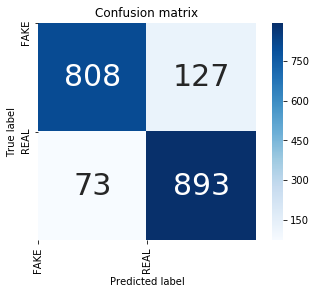

In [18]:
model = MultinomialNB() 
model.fit(count_train, y_train)
pred = model.predict(count_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
Confusion_matrix(cm, classes=['FAKE', 'REAL'])

accuracy:   0.851


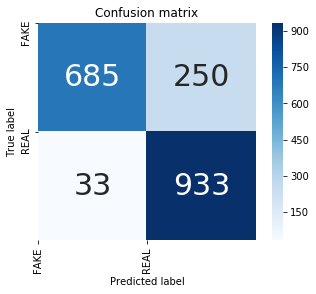

In [19]:
model = MultinomialNB() 
model.fit(tfidf_train, y_train)
pred = model.predict(tfidf_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
Confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [20]:
# Create the list of alphas: 
alphas = np.arange(0, 1, .1)

# Define train_and_predict()
def train_and_predict(alpha):  
    # Instantiate the classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier.fit(tfidf_train, y_train) 
    # Predict the labels
    pred = nb_classifier.predict(tfidf_test)   
    # Compute accuracy
    score = accuracy_score(y_test, pred)
    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()

Alpha:  0.0
Score:  0.891109942135718

Alpha:  0.1
Score:  0.9058390320883746

Alpha:  0.2


D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Score:  0.8963703314045239

Alpha:  0.30000000000000004
Score:  0.893740136770121

Alpha:  0.4
Score:  0.8869016307206733

Alpha:  0.5
Score:  0.8800631246712257

Alpha:  0.6000000000000001
Score:  0.8711204629142556

Alpha:  0.7000000000000001
Score:  0.8679642293529721

Alpha:  0.8
Score:  0.8600736454497633

Alpha:  0.9
Score:  0.8542872172540767

